# TP 2: El Dorado

#### Integrantes
- Mirra, Ariel Marcelo.
- Ricci, Juan Gabriel.

#### Docentes
- Olmedo, Agustin.
- Gioia, Alicia.

### Introduccion
Este trabajo consiste en el uso de las herramientas aprendidas en clase (interpolacion y matplotlib, la libreria grafica para Python) para la resolucion de un problema real: se pierde la localizacion de cierto buque y mediante el uso de datos, predecir su posible localizacion. Las localizaciones pueden ser millones de datos, y sin la ayuda de una computadora seria imposible analizar tanta informacion.

### Resumen
Analisis de datos (latitud y longitud) sobre trayectoria de un buque y un maremoto para el posterior analisis, amplificacion en la precision de los datos y finalmente una prediccion de localizacion del buque.

### Metodologia
Resolveremos cada consigna linealmente, paso por paso ya que creemos que es la mejor manera de llevar a cabo el trabajo.

### 1) Parseo de CSV a lista
Usando la libreria 'csv' se obtendra cada dato y se guardara en una lista.

In [15]:
import csv

ship_path = []
with open('ship_geo_position.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        ship_path.append(row)
        
seaquake_path = []
with open('seaquake_geo_position.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        seaquake_path.append(row)

### 2) Graficacion de datos crudos
A continuacion se graficaran con la herramienta 'matplotlib' los datos que se parsearon anteriormente para conocer mejor el problema que se trata. Creemos que visualizar la informacion es muy importante para estos problemas. 

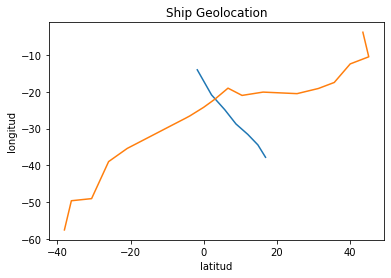

In [16]:
import matplotlib.pyplot as plt

plt.title("Ship Geolocation")
plt.xlabel("latitud")
plt.ylabel("longitud")

ship_path = ship_path[1:]
seaquake_path = seaquake_path[1:]

ship_x = list(map(lambda lat_long: float(lat_long[0]), ship_path))
ship_y = list(map(lambda lat_long: float(lat_long[1]), ship_path))

seaquake_x = list(map(lambda lat_long: float(lat_long[0]), seaquake_path))
seaquake_y = list(map(lambda lat_long: float(lat_long[1]), seaquake_path))

plt.plot(seaquake_x, seaquake_y, ship_x, ship_y)
plt.show()

### 3) Implementacion del Metodo de Newton
Se ha elegido este metodo para "amplificar" una lista y asi obtener mas precision en los datos.

A continuacion se veran: 
- Metodo principal del Metodo de Newton.
- Auxiliar 1: sumatoria de terminos que se restan en el numerador.
- Auxiliar 2: productoria que divide todo.
- Metodo amplificar: nos pedira una lista de x y otra de y asi como tambien un tamaño de lista deseado. Devolvera una lista de 'xs' e 'ys' amplificados, es decir, con mayor cantidad de valores.

In [24]:
# Implementacion del Metodo de Newton
def newton_pol(xs, ys):
    cs = []
    n = len(xs)
    for i in range(n):
        ck = (ys[i] - s(i, cs, xs)) / q(i, xs)
        cs.append(ck)
    pol_str = ""
    for i in range(n):
        pol_str += str(cs[i])
        for j in range(i):
            pol_str += "*(x-%s)" % xs[j]
        if i != n - 1:
            pol_str += " + "
    return lambda x: eval(pol_str, {'x': x})

# Metodo de Newton: metodo auxiliar 1
def s(i, cs, xs):
    s = 0
    for j in range(i):
        p = 1
        for k in range(j):
            p *= xs[i] - xs[k]
        s += cs[j] * p

    return s

# Metodo de Newton: metodo auxiliar 2
def q(i, xs):
    p = 1
    for k in range(i):
        p *= xs[i] - xs[k]
    return p

# ampliación de la intersección
# parametros:
# - xs: valores de x
# - ys: valores de y
# - n : tamanio deseado
def amplify(xs, ys, n):
    if len(xs) >= n: 
        return xs, ys;
    # calcular los puntos entre cada x para asi tener el size n total para la lista amplificada
    between_points = math.ceil((n - len(xs)) / (len(xs) - 1))
    new_xs = []
    new_ys = []
    # se amplifica cada "pedacito", desde xs[i] hasta xs[i+1]
    for i in range(len(xs) - 1):
        delta = (xs[i + 1] - xs[i]) / (between_points + 1)
        temp_xs = [xs[i], xs[i + 1]]
        temp_ys = [ys[i], ys[i + 1]]
        # obtengo funcion con el metodo
        temp_pol = newton_pol(temp_xs, temp_ys)
        # calculo y's con la funcion
        for j in range(between_points + 1):
            new_x = xs[i] + j * delta
            new_y = temp_pol(new_x)
            new_xs.append(new_x)
            new_ys.append(new_y)
    new_xs.append(xs[len(xs) - 1])
    new_ys.append(ys[len(ys) - 1])
    return new_xs, new_ys

### 4) Utilizacion de implementaciones en los datos crudos
Se amplificaran los datos crudos con las implementaciones hechas. El rango de coordenadas que se amplificaran fueron elegidos manualmente (100).

In [25]:
# Elegimos un rango de 100 alrededor de la interseccion
ship_path_zoomed = ship_path[10050:10150] 
seaquake_path_zoomed = seaquake_path[1250:1350]

ship_x_zoomed = list(map(lambda lat_long: float(lat_long[0]), ship_path_zoomed))
ship_y_zoomed = list(map(lambda lat_long: float(lat_long[1]), ship_path_zoomed))

seaquake_x_zoomed = list(map(lambda lat_long: float(lat_long[0]), seaquake_path_zoomed))
seaquake_y_zoomed = list(map(lambda lat_long: float(lat_long[1]), seaquake_path_zoomed))

# amplificamos las listas acotadas anteriores
ship_x_zoomed, ship_y_zoomed = amplify(ship_x_zoomed, ship_y_zoomed, 1000)
seaquake_x_zoomed, seaquake_y_zoomed = amplify(seaquake_x_zoomed, seaquake_y_zoomed, 1000)

### 5) Guardado de datos precisos del buque
En un csv.

In [26]:
# las grabamos en un csv de las coordenadas del buque
f = open("precise_ship_coords.csv", "w+")
f.write("latitud,longitud")
for i in range(len(ship_x_zoomed)):
    f.write(str(ship_x_zoomed[i]) + str(",") + str(ship_y_zoomed[i]) + "\n")
f.close()

### 6) Calculo de posible localizacion del buque
Decidimos realizarlo de 2 maneras, una mediante implementacion y otra manualmente.

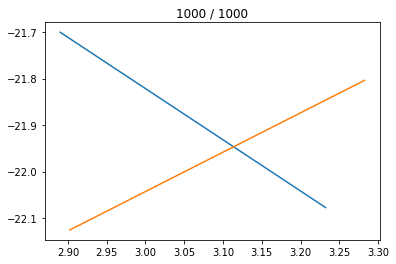

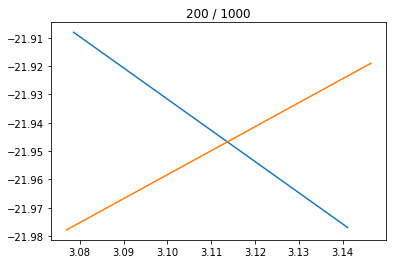

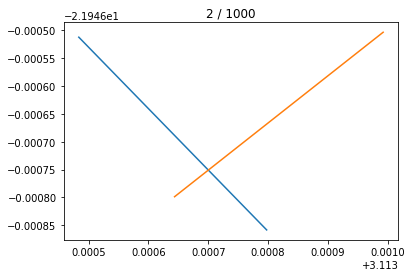

In [52]:
# Graficamos zona acercada con datos precisos.
plt.plot(seaquake_x_zoomed, seaquake_y_zoomed, ship_x_zoomed, ship_y_zoomed)
plt.title("1000 / 1000")
plt.show()

plt.plot(seaquake_x_zoomed[600:800], seaquake_y_zoomed[600:800], ship_x_zoomed[500:700], ship_y_zoomed[500:700])
plt.title("200 / 1000")
plt.show()

plt.plot(seaquake_x_zoomed[711:713], seaquake_y_zoomed[711:713], ship_x_zoomed[605:607], ship_y_zoomed[605:607])
plt.title("2 / 1000")
plt.show()

## Conclusion
Los metodos de interpolacion asi como graficacion son una herramienta muy poderosa para problemas relacionados a sets de puntos en el espacio. La interpolacion es muy util estadisticamente, nos permite obtener una funcion a la cual poder trabajar de manera mas facil.
    Por otro lado el uso de la libreria grafica resulta util para la visualizacion y facilitacion de los datos obtenidos, asi como metodo de depuracion a medida que se realicen diferentes operaciones en el proceso de trabajo. En efecto, matplotlib es una libreria muy utilizada por cientificos para todo tipo de trabajos.

Aprender estas 